In [1]:
#Import all libraries that are required
%matplotlib inline

import numpy as np
import pandas as pd
# pd.options.display.float_formatrmat = '${:,.2f}'.format
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from io import BytesIO
from requests import get
from PIL import Image, ImageDraw
import instaloader
import pymongo
import seaborn as sborn

from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
from itertools import dropwhile, takewhile
import collections
import requests
import base64

from pandas.tools.plotting import scatter_matrix
import nltk
from ast import literal_eval
from datetime import timedelta
import string

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl


import spacy
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
# from contractions import CONTRACTION_MAP
import unicodedata


from collections import Counter
import spacy
nlp = spacy.load('en')

In [2]:
# https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

In [3]:
# create loader object
L = instaloader.Instaloader()

#Set PANDAS to show all columns in DataFrame
# pd.set_option('display.max_columns', None)
# plt.rcParams['figure.figsize'] = (15, 5)

UTC_FILE_NAME = "_UTC"
COMMENTS_FILE_NAME = "_comments"
FILE_ADDRESS_NAME = "InstagramLog/"


DONALD_TRUMP = 'realdonaldtrump'
DONALD_TRUMP_NAME = 'President Donald J. Trump'
DONALD_TRUMP_BIO = '45th President of the United States'
DONALD_TRUMP_COLOR = '#446fc4'
DONALD_TRUMP_TRAIN_SET = DONALD_TRUMP_NAME + DONALD_TRUMP + DONALD_TRUMP_BIO + 'president of the united state of america.'

BARACK_OBAMA = 'barackobama'
BARACK_OBAMA_NAME = 'Barack Obama'
BARACK_OBAMA_BIO = 'Dad, husband, President, citizen.'
BARACK_OBAMA_COLOR = '#7f2d9b'
BARACK_OBAMA_TRAIN_SET = BARACK_OBAMA + BARACK_OBAMA_NAME + BARACK_OBAMA_BIO + '44th President of the United States.'

EMMANUEL_MACRON = 'emmanuelmacron'
EMMANUEL_MACRON_NAME = 'Emmanuel Macron'
EMMANUEL_MACRON_BIO = 'Président de la République française.'
EMMANUEL_MACRON_COLOR = '#369b4f'
EMMANUEL_MACRON_TRAIN_SET = EMMANUEL_MACRON + EMMANUEL_MACRON_NAME + EMMANUEL_MACRON_BIO

#politicians
DONALD_TRUMP = 'realdonaldtrump'
BARACK_OBAMA = 'barackobama'
EMMANUEL_MACRON = 'emmanuelmacron'
THERESA_MAY = 'theresamay'
FLOTUS = 'flotus'

#news agencies
CNN = 'cnn'
FOXNEWS = 'foxnews'
BBC = 'bbcnews'
REUTERS = 'reuters'
GOAL_COM = 'goalglobal' #sport

# sport stars
LEOMESSI = 'leomessi'
CRISTIANO_RONALDO = 'cristiano'
RAFAEL_NADAL = 'rafaelnadal'
ROGER_FEDERER = 'rogerfederer'
NOVAK_DJOKOVIC = 'djokernole'

POLITICIAN = [DONALD_TRUMP, BARACK_OBAMA, EMMANUEL_MACRON, THERESA_MAY]
NEWS_AGENCY = [CNN, BBC, FOXNEWS, REUTERS]
SPROTS_STAR = [LEOMESSI, CRISTIANO_RONALDO, ROGER_FEDERER, RAFAEL_NADAL]


LIST_ALL_USERS = [DONALD_TRUMP , BARACK_OBAMA, EMMANUEL_MACRON, THERESA_MAY, 
                  BBC, CNN, FOXNEWS, REUTERS, 
                  LEOMESSI, CRISTIANO_RONALDO, RAFAEL_NADAL, ROGER_FEDERER ]


NAME_POLITICIAN = "politician"
NAME_NEWSAGENCY = "news agency"
NAME_SPORTSTAR = "sports star"

NAME_CLUSTER_0  = "C0_Fan_Page"
NAME_CLUSTER_1 = "C1_Ordinary_User"
NAME_CLUSTER_2 = "C2_Botlike"

LIST_CLUSTERS = ['C0_Fan_Page', 'C1_Ordinary_User', 'C2_Botlike' ]

LIST_CATEGORIES = ['Politician', 'News agency', 'Sports star' ]

LIST_PLOT_PATTERN = ['///', 'O', '\\\ ', '//\\',
                    '', '', '', '',
                    '==', 'oo', '0//', '////']


# MongoDB Database
instagramClient = pymongo.MongoClient('157.159.68.107:27017',username='koosha',password='1123581321',authSource='Instagram')
instagram_db = instagramClient["Instagram"]
instagram_col_post = instagram_db["Post"]
instagram_col_comment = instagram_db["Comment"]
instagram_col_like = instagram_db["Like"]
instagram_col_analyse = instagram_db["Analyse"]
instagram_col_mentioned_in_comment = instagram_db["MentionedInComment"]

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/koosha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/koosha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# define colors

COLOR_POLITICIAN = '#3e80f0'
COLOR_NEWSAGENCY = '#32a840'
COLOR_SPORTSARTS = '#f56d25'


COLOR_C0 = '#446fc4'
COLOR_C1 = '#7f2d9b'
COLOR_C2 = '#369b4f'


COLORS_COMMUNITIES = [ COLOR_POLITICIAN,
              COLOR_NEWSAGENCY,
              COLOR_SPORTSARTS
                 ]

COLORS_CLUSTERS = [ COLOR_C0,
              COLOR_C1,
              COLOR_C2
                 ]

# Load Clustered Data

In [5]:
df_clustered = pd.read_csv('clustered_data_new.csv')
print(df_clustered.shape[0])

3832


In [6]:
df_c0_comment_trump = pd.read_csv('DataFrames/df_c0_comment_trump.csv')
df_c0_comment_obama = pd.read_csv('DataFrames/df_c0_comment_obama.csv')
df_c0_comment_macron = pd.read_csv('DataFrames/df_c0_comment_macron.csv')
df_c0_comment_may = pd.read_csv('DataFrames/df_c0_comment_may.csv')


df_c0_comment_bbc = pd.read_csv('DataFrames/df_c0_comment_bbc.csv')
df_c0_comment_cnn = pd.read_csv('DataFrames/df_c0_comment_cnn.csv')
df_c0_comment_foxnews = pd.read_csv('DataFrames/df_c0_comment_foxnews.csv')
df_c0_comment_reuters = pd.read_csv('DataFrames/df_c0_comment_reuters.csv')

df_c0_comment_messi = pd.read_csv('DataFrames/df_c0_comment_messi.csv')
df_c0_comment_ronaldo = pd.read_csv('DataFrames/df_c0_comment_ronaldo.csv')
df_c0_comment_nadal = pd.read_csv('DataFrames/df_c0_comment_nadal.csv')
df_c0_comment_federer = pd.read_csv('DataFrames/df_c0_comment_federer.csv')


df_c0_like_trump = pd.read_csv('DataFrames/df_c0_like_trump.csv')
df_c0_like_obama = pd.read_csv('DataFrames/df_c0_like_obama.csv')
df_c0_like_macron = pd.read_csv('DataFrames/df_c0_like_macron.csv')
df_c0_like_may = pd.read_csv('DataFrames/df_c0_like_may.csv')

df_c0_like_bbc = pd.read_csv('DataFrames/df_c0_like_bbc.csv')
df_c0_like_cnn = pd.read_csv('DataFrames/df_c0_like_cnn.csv')
df_c0_like_foxnews = pd.read_csv('DataFrames/df_c0_like_foxnews.csv')
df_c0_like_reuters = pd.read_csv('DataFrames/df_c0_like_reuters.csv')

df_c0_like_messi = pd.read_csv('DataFrames/df_c0_like_messi.csv')
df_c0_like_ronaldo = pd.read_csv('DataFrames/df_c0_like_ronaldo.csv')
df_c0_like_nadal = pd.read_csv('DataFrames/df_c0_like_nadal.csv')
df_c0_like_federer = pd.read_csv('DataFrames/df_c0_like_federer.csv')

In [7]:
df_c1_comment_trump = pd.read_csv('DataFrames/df_c1_comment_trump.csv')
df_c1_comment_obama = pd.read_csv('DataFrames/df_c1_comment_obama.csv')
df_c1_comment_macron = pd.read_csv('DataFrames/df_c1_comment_macron.csv')
df_c1_comment_may = pd.read_csv('DataFrames/df_c1_comment_may.csv')

df_c1_comment_bbc = pd.read_csv('DataFrames/df_c1_comment_bbc.csv')
df_c1_comment_cnn = pd.read_csv('DataFrames/df_c1_comment_cnn.csv')
df_c1_comment_foxnews = pd.read_csv('DataFrames/df_c1_comment_foxnews.csv')
df_c1_comment_reuters = pd.read_csv('DataFrames/df_c1_comment_reuters.csv')

df_c1_comment_messi = pd.read_csv('DataFrames/df_c1_comment_messi.csv')
df_c1_comment_ronaldo = pd.read_csv('DataFrames/df_c1_comment_ronaldo.csv')
df_c1_comment_nadal = pd.read_csv('DataFrames/df_c1_comment_nadal.csv')
df_c1_comment_federer = pd.read_csv('DataFrames/df_c1_comment_federer.csv')


df_c1_like_trump = pd.read_csv('DataFrames/df_c1_like_trump.csv')
df_c1_like_obama = pd.read_csv('DataFrames/df_c1_like_obama.csv')
df_c1_like_macron = pd.read_csv('DataFrames/df_c1_like_macron.csv')
df_c1_like_may = pd.read_csv('DataFrames/df_c1_like_may.csv')

df_c1_like_bbc = pd.read_csv('DataFrames/df_c1_like_bbc.csv')
df_c1_like_cnn = pd.read_csv('DataFrames/df_c1_like_cnn.csv')
df_c1_like_foxnews = pd.read_csv('DataFrames/df_c1_like_foxnews.csv')
df_c1_like_reuters = pd.read_csv('DataFrames/df_c1_like_reuters.csv')

df_c1_like_messi = pd.read_csv('DataFrames/df_c1_like_messi.csv')
df_c1_like_ronaldo = pd.read_csv('DataFrames/df_c1_like_ronaldo.csv')
df_c1_like_nadal = pd.read_csv('DataFrames/df_c1_like_nadal.csv')
df_c1_like_federer = pd.read_csv('DataFrames/df_c1_like_federer.csv')

In [8]:
df_c2_comment_trump = pd.read_csv('DataFrames/df_c2_comment_trump.csv')
df_c2_comment_obama = pd.read_csv('DataFrames/df_c2_comment_obama.csv')
df_c2_comment_macron = pd.read_csv('DataFrames/df_c2_comment_macron.csv')
df_c2_comment_may = pd.read_csv('DataFrames/df_c2_comment_may.csv')

df_c2_comment_bbc = pd.read_csv('DataFrames/df_c2_comment_bbc.csv')
df_c2_comment_cnn = pd.read_csv('DataFrames/df_c2_comment_cnn.csv')
df_c2_comment_foxnews = pd.read_csv('DataFrames/df_c2_comment_foxnews.csv')
df_c2_comment_reuters = pd.read_csv('DataFrames/df_c2_comment_reuters.csv')

df_c2_comment_messi = pd.read_csv('DataFrames/df_c2_comment_messi.csv')
df_c2_comment_ronaldo = pd.read_csv('DataFrames/df_c2_comment_ronaldo.csv')
df_c2_comment_nadal = pd.read_csv('DataFrames/df_c2_comment_nadal.csv')
df_c2_comment_federer = pd.read_csv('DataFrames/df_c2_comment_federer.csv')


df_c2_like_trump = pd.read_csv('DataFrames/df_c2_like_trump.csv')
df_c2_like_obama = pd.read_csv('DataFrames/df_c2_like_obama.csv')
df_c2_like_macron = pd.read_csv('DataFrames/df_c2_like_macron.csv')
df_c2_like_may = pd.read_csv('DataFrames/df_c2_like_may.csv')

df_c2_like_bbc = pd.read_csv('DataFrames/df_c2_like_bbc.csv')
df_c2_like_cnn = pd.read_csv('DataFrames/df_c2_like_cnn.csv')
df_c2_like_foxnews = pd.read_csv('DataFrames/df_c2_like_foxnews.csv')
df_c2_like_reuters = pd.read_csv('DataFrames/df_c2_like_reuters.csv')

df_c2_like_messi = pd.read_csv('DataFrames/df_c2_like_messi.csv')
df_c2_like_ronaldo = pd.read_csv('DataFrames/df_c2_like_ronaldo.csv')
df_c2_like_nadal = pd.read_csv('DataFrames/df_c2_like_nadal.csv')
df_c2_like_federer = pd.read_csv('DataFrames/df_c2_like_federer.csv')

# Dataframe like+comment each case

In [9]:
# df of both comment and like in each usecase - c2

#politicians
df_c2_both_trump = pd.concat([df_c2_comment_trump, df_c2_like_trump])
df_c2_both_obama = pd.concat([df_c2_comment_obama, df_c2_like_obama])
df_c2_both_macron = pd.concat([df_c2_comment_macron, df_c2_like_macron])
df_c2_both_may = pd.concat([df_c2_comment_may, df_c2_like_may])

#News agencies
df_c2_both_bbc = pd.concat([df_c2_comment_bbc, df_c2_like_bbc])
df_c2_both_cnn = pd.concat([df_c2_comment_cnn, df_c2_like_cnn])
df_c2_both_foxnews = pd.concat([df_c2_comment_foxnews, df_c2_like_foxnews])
df_c2_both_reuters = pd.concat([df_c2_comment_reuters, df_c2_like_reuters])

#Sports star
df_c2_both_messi = pd.concat([df_c2_comment_messi, df_c2_like_messi])
df_c2_both_ronaldo = pd.concat([df_c2_comment_ronaldo, df_c2_like_ronaldo])
df_c2_both_nadal = pd.concat([df_c2_comment_nadal, df_c2_like_nadal])
df_c2_both_federer = pd.concat([df_c2_comment_federer, df_c2_like_federer])

# Dataframe comment - per use case

In [10]:
#df of all comments per usecase
df_comment_trump = pd.concat([df_c0_comment_trump, df_c1_comment_trump, df_c2_comment_trump])
df_comment_obama = pd.concat([df_c0_comment_obama, df_c1_comment_obama, df_c2_comment_obama])
df_comment_macron = pd.concat([df_c0_comment_macron, df_c1_comment_macron, df_c2_comment_macron])
df_comment_may = pd.concat([df_c0_comment_may, df_c1_comment_may, df_c2_comment_may])

df_comment_bbc = pd.concat([df_c0_comment_bbc, df_c1_comment_bbc, df_c2_comment_bbc])
df_comment_cnn = pd.concat([df_c0_comment_cnn, df_c1_comment_cnn, df_c2_comment_cnn])
df_comment_foxnews = pd.concat([df_c0_comment_foxnews, df_c1_comment_foxnews, df_c2_comment_foxnews])
df_comment_reuters = pd.concat([df_c0_comment_reuters, df_c1_comment_reuters, df_c2_comment_reuters])

df_comment_messi = pd.concat([df_c0_comment_messi, df_c1_comment_messi, df_c2_comment_messi])
df_comment_ronaldo = pd.concat([df_c0_comment_ronaldo, df_c1_comment_ronaldo, df_c2_comment_ronaldo])
df_comment_nadal = pd.concat([df_c0_comment_nadal, df_c1_comment_nadal, df_c2_comment_nadal])
df_comment_federer = pd.concat([df_c0_comment_federer, df_c1_comment_federer, df_c2_comment_federer])

# Dataframe like - per use case

In [11]:
#df of all likes per usecase
df_like_trump = pd.concat([df_c0_like_trump, df_c1_like_trump, df_c2_like_trump])
df_like_obama = pd.concat([df_c0_like_obama, df_c1_like_obama, df_c2_like_obama])
df_like_macron = pd.concat([df_c0_like_macron, df_c1_like_macron, df_c2_like_macron])
df_like_may = pd.concat([df_c0_like_may, df_c1_like_may, df_c2_like_may])

df_like_bbc = pd.concat([df_c0_like_bbc, df_c1_like_bbc, df_c2_like_bbc])
df_like_cnn = pd.concat([df_c0_like_cnn, df_c1_like_cnn, df_c2_like_cnn])
df_like_foxnews = pd.concat([df_c0_like_foxnews, df_c1_like_foxnews, df_c2_like_foxnews])
df_like_reuters = pd.concat([df_c0_like_reuters, df_c1_like_reuters, df_c2_like_reuters])

df_like_messi = pd.concat([df_c0_like_messi, df_c1_like_messi, df_c2_like_messi])
df_like_ronaldo = pd.concat([df_c0_like_ronaldo, df_c1_like_ronaldo, df_c2_like_ronaldo])
df_like_nadal = pd.concat([df_c0_like_nadal, df_c1_like_nadal, df_c2_like_nadal])
df_like_federer = pd.concat([df_c0_like_federer, df_c1_like_federer, df_c2_like_federer])

# Dataframe comment - per category

In [12]:
#df of all comments per usecase
df_comment_politician = pd.concat([df_comment_trump, df_comment_obama, df_comment_macron, df_comment_may])
df_comment_politician['community'] = NAME_POLITICIAN

df_comment_newsagency = pd.concat([df_comment_bbc, df_comment_cnn, df_comment_foxnews, df_comment_reuters])
df_comment_newsagency['community'] = NAME_NEWSAGENCY

df_comment_sportstar = pd.concat([df_comment_messi, df_comment_ronaldo, df_comment_nadal, df_comment_federer])
df_comment_sportstar['community'] = NAME_SPORTSTAR

In [13]:
print(df_comment_politician.shape[0])
print(df_comment_newsagency.shape[0])
print(df_comment_sportstar.shape[0])

328
20
4471


# Dataframe like - per category

In [14]:
#df of all comments per usecase
df_like_politician = pd.concat([df_like_trump, df_like_obama, df_like_macron, df_like_may])

df_like_newsagency = pd.concat([df_like_bbc, df_like_cnn, df_like_foxnews, df_like_reuters])

df_like_sportstar = pd.concat([df_like_messi, df_like_ronaldo, df_like_nadal, df_like_federer])

In [15]:
df_c0_comment_politician = pd.concat([df_c0_comment_trump, df_c0_comment_obama, df_c0_comment_macron, df_c0_comment_may])
df_c0_comment_politician['community'] = NAME_POLITICIAN
df_c0_comment_newsagency = pd.concat([df_c0_comment_bbc, df_c0_comment_cnn, df_c0_comment_foxnews, df_c0_comment_reuters])
df_c0_comment_newsagency['community'] = NAME_NEWSAGENCY
df_c0_comment_sportstar = pd.concat([df_c0_comment_messi, df_c0_comment_ronaldo, df_c0_comment_nadal, df_c0_comment_federer])
df_c0_comment_sportstar['community'] = NAME_SPORTSTAR


df_c1_comment_politician = pd.concat([df_c1_comment_trump, df_c1_comment_obama, df_c1_comment_macron, df_c1_comment_may])
df_c1_comment_politician['community'] = NAME_POLITICIAN
df_c1_comment_newsagency = pd.concat([df_c1_comment_bbc, df_c1_comment_cnn, df_c1_comment_foxnews, df_c1_comment_reuters])
df_c1_comment_newsagency['community'] = NAME_NEWSAGENCY
df_c1_comment_sportstar = pd.concat([df_c1_comment_messi, df_c1_comment_ronaldo, df_c1_comment_nadal, df_c1_comment_federer])
df_c1_comment_sportstar['community'] = NAME_SPORTSTAR

df_c2_comment_politician = pd.concat([df_c2_comment_trump, df_c2_comment_obama, df_c2_comment_macron, df_c2_comment_may])
df_c2_comment_politician['community'] = NAME_POLITICIAN
df_c2_comment_newsagency = pd.concat([df_c2_comment_bbc, df_c2_comment_cnn, df_c2_comment_foxnews, df_c2_comment_reuters])
df_c2_comment_newsagency['community'] = NAME_NEWSAGENCY
df_c2_comment_sportstar = pd.concat([df_c2_comment_messi, df_c2_comment_ronaldo, df_c2_comment_nadal, df_c2_comment_federer])
df_c2_comment_sportstar['community'] = NAME_SPORTSTAR

# Dataframe comment - per cluster

In [16]:
# df all comment

df_c0_comments = pd.concat([df_c0_comment_politician, df_c0_comment_newsagency, df_c0_comment_sportstar])
df_c0_comments['cluster'] = NAME_CLUSTER_0

df_c1_comments = pd.concat([df_c1_comment_politician, df_c1_comment_newsagency, df_c1_comment_sportstar ])
df_c1_comments['cluster'] = NAME_CLUSTER_1

df_c2_comments = pd.concat([df_c2_comment_politician, df_c2_comment_newsagency, df_c2_comment_sportstar ])
df_c2_comments['cluster'] = NAME_CLUSTER_2



df_c0_like = pd.concat([df_c0_like_trump, df_c0_like_obama, df_c0_like_macron, df_c0_like_may,
                           df_c0_like_bbc, df_c0_like_cnn, df_c0_like_foxnews, df_c0_like_reuters,
                            df_c0_like_messi, df_c0_like_ronaldo, df_c0_like_nadal, df_c0_like_federer,
                           ])


df_c1_like = pd.concat([df_c1_like_trump, df_c1_like_obama, df_c1_like_macron, df_c1_like_may,
                           df_c1_like_bbc, df_c1_like_cnn, df_c1_like_foxnews, df_c1_like_reuters,
                            df_c1_like_messi, df_c1_like_ronaldo, df_c1_like_nadal, df_c1_like_federer,
                           ])


df_c2_like = pd.concat([df_c2_like_trump, df_c2_like_obama, df_c2_like_macron, df_c2_like_may,
                           df_c2_like_bbc, df_c2_like_cnn, df_c2_like_foxnews, df_c2_like_reuters,
                            df_c2_like_messi, df_c2_like_ronaldo, df_c2_like_nadal, df_c2_like_federer,
                           ])




print("cluster 0-fan: " + str(df_c0_comments.shape[0]))
print("cluster 1-ordinary: " + str(df_c1_comments.shape[0]))
print("cluster 2-botlike: " + str(df_c2_comments.shape[0]))
print("----")
print("cluster 0-fan: " + str(df_c0_like.shape[0]))
print("cluster 1-ordinary: " + str(df_c1_like.shape[0]))
print("cluster 2-botlike: " + str(df_c2_like.shape[0]))

cluster 0-fan: 2519
cluster 1-ordinary: 2087
cluster 2-botlike: 213
----
cluster 0-fan: 1317
cluster 1-ordinary: 775
cluster 2-botlike: 506


# Dataframe all - comment

In [17]:
df_comments = pd.concat([df_c0_comments, df_c1_comments, df_c2_comments])

# Text analysis

In [18]:
df_comments.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'username', 'name', 'bio', 'photo',
       'nfollower', 'nfollowee', 'nmediacount', 'follower', 'followee',
       'mediacount', 'private', 'verified', 'lcm', 'mcm', 'nmcm', 'class',
       'class BGM 3', 'class GM 3', 'class kmeans 3', 'class spectral 3',
       'class GM 4', 'owener_id', 'combined_owener_external_url',
       'combined_username', 'combined_full_name', 'combined_profile_pic_url',
       'combined_biography', 'combined_similarity_photo_comment',
       'combined_similarity_photo_like', 'comment_created_at', 'comment_id',
       'comment_post_shortcode', 'comment_shortcode_username', 'comment_text',
       'comment_total', 'like_total', 'like_shortcode_username',
       'like_post_shortcode', 'like_id', 'comment_post_date',
       'comment_avg_age_sec', 'comment_age_sec', 'community', 'cluster'],
      dtype='object')

In [19]:
df_analyse_temp = df_comments[['owener_id', 'combined_username', 'comment_text', 'cluster', 'community']]#, 'comment_post_shortcode', 'comment_shortcode_username']]
df_analyse_temp.head()

owener_id combined_username  \
0   14227465    chris_woodward   
1   14227465    chris_woodward   
2   14227465    chris_woodward   
3  201761741            masglu   
4  201761741            masglu   

                                        comment_text      cluster   community  
0                                                 ❤️  C0_Fan_Page  politician  
1  @ajmal_hakkim_ if you had proper grammar peopl...  C0_Fan_Page  politician  
2  @n_aditya14 says someone that spells you’re “u...  C0_Fan_Page  politician  
3  Sick. Very sad. I wish we would have no more o...  C0_Fan_Page  politician  
4        Thanks for supporting ALL Americans!!🇺🇸🇺🇸🇺🇸  C0_Fan_Page  politician

In [20]:
def clean_text(_row):
    
    # Load the regular expression library
    import re
    
    text = _row['comment_text']
    
    text = re.sub(r'http\S+', '', text) # remove http links
    text = re.sub(r'bit.ly/\S+', '', text) # rempve bitly links
    text = text.strip('[link]') # remove [links]
    text = re.sub('\S*@\S*\s?', '', text)  # remove emails
    text = re.sub('\s+', ' ', text)  # remove newline chars
    text = re.sub("\'", "", text)  # remove single quotes

    #emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove punctuation
    text = re.sub('[,\.!?]', '', text)

    # Convert the titles to lowercase
    text = text.lower()

    _row['comment_text_clean'] = text
        
    return _row

df_analyse_temp = df_analyse_temp.apply(clean_text, axis=1)

In [21]:
nlp = spacy.load('en', parse = True, tag=True, entity=True)
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [22]:
# ps = nltk.porter.PorterStemmer()

# def simple_stemmer(_row):
    
#     text = _row['comment_text_clean']
#     text = ' '.join([ps.stem(word) for word in text.split()])
#     _row['comment_text_clean_stemming'] = text
#     return _row

# df_analyse_temp = df_analyse_temp.apply(simple_stemmer, axis=1)

In [23]:
# def lemmatize_text(_row):
    
#     text = _row['comment_text_clean']
#     text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
#     _row['comment_text_clean_lemmitized'] = text
#     return _row

# df_analyse_temp = df_analyse_temp.apply(lemmatize_text, axis=1)

In [24]:
def remove_stopwords(_row):#, is_lower_case=False):
    
    is_lower_case = True
    text = _row['comment_text_clean']
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    
    _row['comment_text_clean_filtered'] = filtered_text
    return _row

df_analyse_temp = df_analyse_temp.apply(remove_stopwords, axis=1)

In [25]:
df_analyse_temp.head()

owener_id combined_username  \
0   14227465    chris_woodward   
1   14227465    chris_woodward   
2   14227465    chris_woodward   
3  201761741            masglu   
4  201761741            masglu   

                                        comment_text      cluster   community  \
0                                                 ❤️  C0_Fan_Page  politician   
1  @ajmal_hakkim_ if you had proper grammar peopl...  C0_Fan_Page  politician   
2  @n_aditya14 says someone that spells you’re “u...  C0_Fan_Page  politician   
3  Sick. Very sad. I wish we would have no more o...  C0_Fan_Page  politician   
4        Thanks for supporting ALL Americans!!🇺🇸🇺🇸🇺🇸  C0_Fan_Page  politician   

                                  comment_text_clean  \
0                                                      
1  if you had proper grammar people would be able...   
2               says someone that spells you’re “ur”   
3  sick very sad i wish we would have no more of ...   
4                thanks for supporting all americans   

                         comment_text_clean_filtered  
0                                                     
1  proper grammar people would able understand de...  
2                        says someone spells ’ “ur ”  
3              sick sad wish would no ’ afraid ’ end  
4                        thanks supporting americans

# sentiment

In [26]:
# https://medium.com/@himanshu_23732/sentiment-analysis-with-afinn-lexicon-930533dfe75b

In [27]:
corpus = df_analyse_temp['comment_text_clean'].tolist()

In [28]:
# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in corpus]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
    
    
# sentiment statistics per news category
df = pd.DataFrame([ list(df_analyse_temp['cluster']), list(df_analyse_temp['community']), sentiment_scores, sentiment_category]).T
df.columns = ['cluster', 'community', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
# df
df.groupby(by=['cluster', 'community']).describe()

sentiment_score                                  \
                                       count      mean       std   min   25%   
cluster          community                                                     
C0_Fan_Page      news agency            14.0  1.857143  1.657484   0.0  0.00   
                 politician            160.0  0.231250  3.648420 -24.0  0.00   
                 sports star          2345.0  0.521962  1.430876  -6.0  0.00   
C1_Ordinary_User news agency             6.0  3.166667  1.940790   0.0  2.25   
                 politician             31.0  0.838710  2.395785  -4.0  0.00   
                 sports star          2050.0  0.712683  1.784343  -7.0  0.00   
C2_Botlike       politician            137.0  2.700730  3.660932  -6.0  0.00   
                 sports star            76.0  0.736842  1.906959  -2.0  0.00   

                                               
                              50%   75%   max  
cluster          community                     
C0_Fan_Page      news agency  2.0  3.00   4.0  
                 politician   0.0  2.00   9.0  
                 sports star  0.0  0.00  12.0  
C1_Ordinary_User news agency  3.5  4.75   5.0  
                 politician   0.0  2.00   8.0  
                 sports star  0.0  0.00  19.0  
C2_Botlike       politician   2.0  4.00  14.0  
                 sports star  0.0  0.00  10.0

In [29]:
pos_idx = df[(df.cluster==NAME_CLUSTER_0) & (df.sentiment_score <-2)].index[0]
neg_idx = df[(df.cluster==NAME_CLUSTER_0) & (df.sentiment_score < -20)].index[0]

pos_idx
print('Most Negative Tech News Article:', df_analyse_temp.iloc[neg_idx][['comment_text_clean']][0])
print()
print('Most Positive Tech News Article:', df_analyse_temp.iloc[pos_idx][['comment_text_clean']][0])

Most Negative Tech News Article: can we focus on praying for the people who have died this week not just here but also the school bus that went into the dead sea with all those children on it it was a hate crime what happened there and an accident with the bus we should be praying for the families not being negative towards each other it’s the negativity that causes hate crimes and if you want to comment on a post like this blaming trump then you’re contributing to hate

Most Positive Tech News Article: sick very sad i wish we would have no more of it but i’m afraid it won’t end


In [30]:
pos_idx = df[(df.community==NAME_POLITICIAN) & (df.sentiment_score > 5)].index[0]
neg_idx = df[(df.community==NAME_SPORTSTAR) & (df.sentiment_score < -4)].index[0]

pos_idx
print('Most Negative Tech News Article:', df_analyse_temp.iloc[neg_idx][['comment_text_clean']][0])
print()
print('Most Positive Tech News Article:', df_analyse_temp.iloc[pos_idx][['comment_text_clean']][0])

Most Negative Tech News Article: haters still hate but cristiano always cristiano 

Most Positive Tech News Article: thank you for taking care of america god bless america and trump


In [31]:
df.groupby(by=['cluster']).describe()

sentiment_score                                           \
                           count      mean       std   min  25%  50%  75%   
cluster                                                                     
C0_Fan_Page               2519.0  0.510917  1.666071 -24.0  0.0  0.0  0.0   
C1_Ordinary_User          2087.0  0.721610  1.799016  -7.0  0.0  0.0  0.0   
C2_Botlike                 213.0  2.000000  3.282314  -6.0  0.0  0.0  3.0   

                        
                   max  
cluster                 
C0_Fan_Page       12.0  
C1_Ordinary_User  19.0  
C2_Botlike        14.0

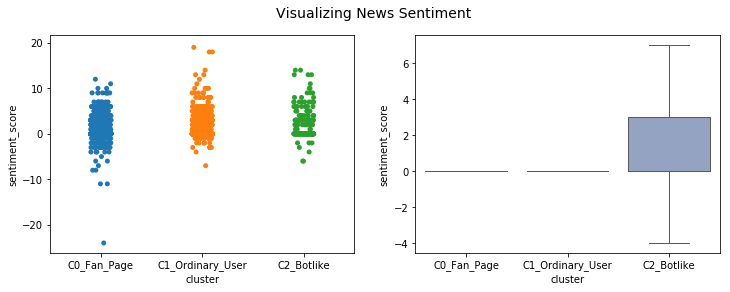

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sp = sns.stripplot(x='cluster', y="sentiment_score", data=df, ax=ax1)

bp = sns.boxplot(x='cluster', y="sentiment_score", data=df, palette="Set2", ax=ax2, showfliers=False, linewidth=1,)

# bp.set_yscale('log')

t = f.suptitle('Visualizing News Sentiment', fontsize=14)

Sentiment score for all comment issued by impersonator across communities


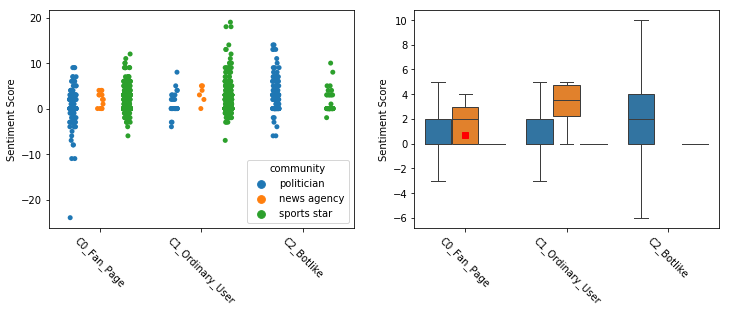

In [33]:
def plot_2():
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))#, sharey=True)

    color = {NAME_CLUSTER_0: COLOR_C0, NAME_CLUSTER_1: COLOR_C1, NAME_CLUSTER_2:COLOR_C2}
    sp = sns.stripplot(x='cluster', y="sentiment_score", hue='community',dodge=True, data=df, ax=ax1, c=color)
    sp.set_ylabel("Sentiment Score")
    sp.set_xlabel("")
    sp.set_title("")
    sp.xaxis.set_tick_params(rotation=-45)
    

    bp = sns.boxplot(x='cluster', y="sentiment_score", hue='community', data=df, ax=ax2, showfliers=False, linewidth=1,)
    bp.plot(df.mean(), 'rs')
    bp.set_ylabel("Sentiment Score")
    bp.set_xlabel("")
    bp.set_title("")
    bp.xaxis.set_tick_params(rotation=-45)
    bp.legend().remove()
    
#     for j in range(len(bp.columns)):
#         mybox = bp.artists[j]
#         mybox.set_facecolor(COLORS_COMMUNITIES[j])
#         mybox.set_alpha(0.4)
#         mybox.set(hatch = LIST_PLOT_PATTERN[j])
        
#     bp.legend(frameon=False, loc='lower center', ncol=3)

    plt.savefig("plot_MLearning14_P2.pdf", bbox_inches='tight')

    print("Sentiment score for all comment issued by impersonator across communities")
    # t = f.suptitle('Visualizing News Sentiment', fontsize=14)
    
plot_2()

In [34]:
df.head()

cluster   community  sentiment_score sentiment_category
0  C0_Fan_Page  politician              0.0            neutral
1  C0_Fan_Page  politician             -1.0           negative
2  C0_Fan_Page  politician              0.0            neutral
3  C0_Fan_Page  politician             -3.0           negative
4  C0_Fan_Page  politician              3.0           positive

In [118]:
df.groupby(['cluster', 'community']).describe()

sentiment_score                                  \
                                       count      mean       std   min   25%   
cluster          community                                                     
C0_Fan_Page      news agency            14.0  1.857143  1.657484   0.0  0.00   
                 politician            160.0  0.231250  3.648420 -24.0  0.00   
                 sports star          2345.0  0.521962  1.430876  -6.0  0.00   
C1_Ordinary_User news agency             6.0  3.166667  1.940790   0.0  2.25   
                 politician             31.0  0.838710  2.395785  -4.0  0.00   
                 sports star          2050.0  0.712683  1.784343  -7.0  0.00   
C2_Botlike       politician            137.0  2.700730  3.660932  -6.0  0.00   
                 sports star            76.0  0.736842  1.906959  -2.0  0.00   

                                               
                              50%   75%   max  
cluster          community                     
C0_Fan_Page      news agency  2.0  3.00   4.0  
                 politician   0.0  2.00   9.0  
                 sports star  0.0  0.00  12.0  
C1_Ordinary_User news agency  3.5  4.75   5.0  
                 politician   0.0  2.00   8.0  
                 sports star  0.0  0.00  19.0  
C2_Botlike       politician   2.0  4.00  14.0  
                 sports star  0.0  0.00  10.0

In [119]:
df.groupby(['community', 'cluster']).describe()

sentiment_score                                  \
                                       count      mean       std   min   25%   
community   cluster                                                            
news agency C0_Fan_Page                 14.0  1.857143  1.657484   0.0  0.00   
            C1_Ordinary_User             6.0  3.166667  1.940790   0.0  2.25   
politician  C0_Fan_Page                160.0  0.231250  3.648420 -24.0  0.00   
            C1_Ordinary_User            31.0  0.838710  2.395785  -4.0  0.00   
            C2_Botlike                 137.0  2.700730  3.660932  -6.0  0.00   
sports star C0_Fan_Page               2345.0  0.521962  1.430876  -6.0  0.00   
            C1_Ordinary_User          2050.0  0.712683  1.784343  -7.0  0.00   
            C2_Botlike                  76.0  0.736842  1.906959  -2.0  0.00   

                                               
                              50%   75%   max  
community   cluster                            
news agency C0_Fan_Page       2.0  3.00   4.0  
            C1_Ordinary_User  3.5  4.75   5.0  
politician  C0_Fan_Page       0.0  2.00   9.0  
            C1_Ordinary_User  0.0  2.00   8.0  
            C2_Botlike        2.0  4.00  14.0  
sports star C0_Fan_Page       0.0  0.00  12.0  
            C1_Ordinary_User  0.0  0.00  19.0  
            C2_Botlike        0.0  0.00  10.0

/home/koosha/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


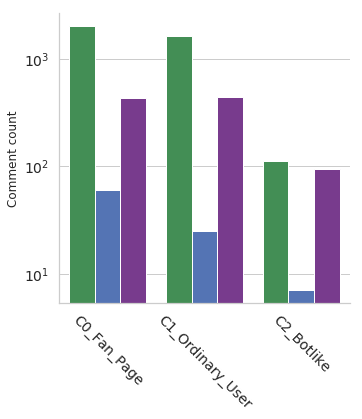

In [35]:
def plot_3():
    
    sns.set(style="whitegrid")
#     sns.set(style="whitegrid")
#     sborn.set(font_scale=1.5)
    
    
#     f, axes = plt.subplots(1, 1, figsize=(5, 4))#, sharey=True)

#     color = {NAME_CLUSTER_0: COLOR_C0, NAME_CLUSTER_1: COLOR_C1, NAME_CLUSTER_2:COLOR_C2}
    
    fc = sns.factorplot(x="cluster", hue="sentiment_category",
                        data=df, kind="count", 
                        legend=False,
                        palette={"negative": COLOR_C0, 
                                 "positive": COLOR_C1, 
                                 "neutral": COLOR_C2})

    axes = fc.axes.flatten()
    axes[0].set_ylabel("Comment count")
    axes[0].set_xlabel("")
    
#     fc.set_title("")
    axes[0].xaxis.set_tick_params(rotation=-45)
    
    # g = sns.factorplot("class", "survived", "sex",
    #                    data=titanic, kind="bar",
    #                    size=6, palette="muted", legend=False)
    
    fc.fig.get_axes()[0].set_yscale('log')
    
    for ax in fc.axes.flat:
        for label in ax.get_yticklabels():
            label.set_fontsize(14)
            
        for label in ax.get_xticklabels():
            label.set_fontsize(14)
    plt.savefig("plot_MLearning14_P3.pdf", bbox_inches='tight')

    # fc.set_yscale('log')
    
plot_3()

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


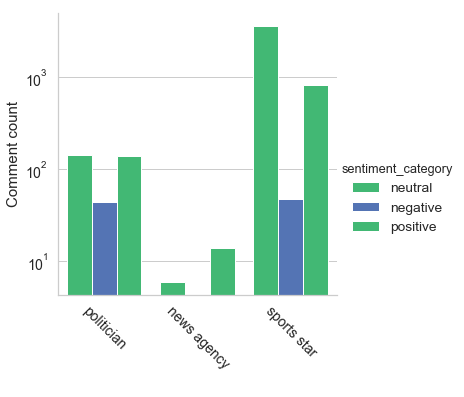

In [124]:
def plot_4():
    
    fc = sns.factorplot(x="community", hue="sentiment_category",
                        data=df, kind="count", 
                        legend=True,
                        palette={"negative": COLOR_C0, 
                                 "positive": "#2ecc71", 
                                 "neutral": "#2ecc71"})
    
#      "#ç", "#34495e", "#2ecc71"
    
    axes = fc.axes.flatten()
    axes[0].set_ylabel("Comment count")
    axes[0].set_xlabel(" ")
#     fc.set_title("")
    axes[0].xaxis.set_tick_params(rotation=-45)

    fc.fig.get_axes()[0].set_yscale('log')


    for ax in fc.axes.flat:
        for label in ax.get_yticklabels():
            label.set_fontsize(14)
            
        for label in ax.get_xticklabels():
            label.set_fontsize(14)
        
    plt.savefig("plot_MLearning14_P4.pdf", bbox_inches='tight')

    
plot_4()

# textbibe

In [37]:
from textblob import TextBlob

# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in corpus]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]


# sentiment statistics per news category
dft = pd.DataFrame([list(df_analyse_temp['cluster']), list(df_analyse_temp['community']), sentiment_scores_tb, sentiment_category_tb]).T
dft.columns = ['cluster', 'community', 'sentiment_score', 'sentiment_category']
dft['sentiment_score'] = dft.sentiment_score.astype('float')
dft.groupby(by=['cluster']).describe()

sentiment_score                                             
                           count      mean       std  min  25%  50%  75%  max
cluster                                                                      
C0_Fan_Page               2519.0  0.093386  0.261128 -1.0  0.0  0.0  0.0  1.0
C1_Ordinary_User          2087.0  0.110474  0.275241 -1.0  0.0  0.0  0.0  1.0
C2_Botlike                 213.0  0.214915  0.328639 -0.6  0.0  0.0  0.5  1.0

/home/koosha/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


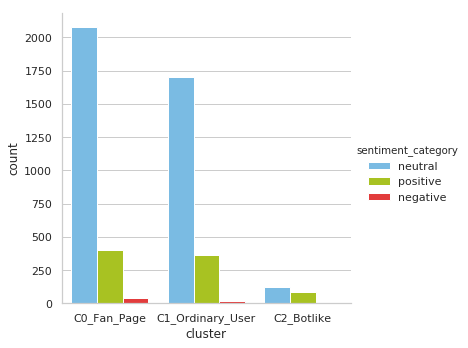

In [38]:
fc = sns.factorplot(x="cluster", hue="sentiment_category", 
                    data=dft, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})


# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# sp = sns.stripplot(x='cluster', y="sentiment_score", data=df, ax=ax1)

# bp = sns.boxplot(x='cluster', y="sentiment_score", data=df, palette="Set2", ax=ax2, showfliers=False, linewidth=1,)

# fc.set_yscale('log')

# t = f.suptitle('Visualizing News Sentiment', fontsize=14)

# Wordcloud of all comment 

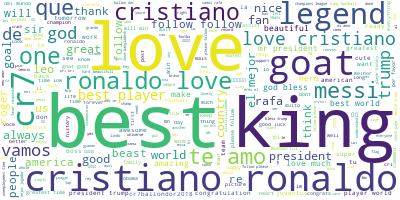

In [39]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df_analyse_temp['comment_text_clean'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [40]:
# method one - https://stackabuse.com/python-for-nlp-topic-modeling/

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(df_analyse_temp['comment_text_clean'].values.astype('U'))

In [42]:
doc_term_matrix

<4819x963 sparse matrix of type '<class 'numpy.int64'>'
	with 5871 stored elements in Compressed Sparse Row format>

In [43]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [44]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

idol
need
kiss
siiiiiii
die
اليوفي
lmao
states
style
idolooo


In [45]:
first_topic = LDA.components_[0]

In [46]:
top_topic_words = first_topic.argsort()[-10:]

In [47]:
top_topic_words

array([222, 176,  69, 646, 538, 499, 212, 590, 839,  74])

In [48]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

eres
del
beast
ronaldo
nice
mejor
el
player
world
best


In [49]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['eres', 'del', 'beast', 'ronaldo', 'nice', 'mejor', 'el', 'player', 'world', 'best']


Top 10 words for topic #1:
['league', 'cute', 'hero', 'super', 'boss', 'rafa', 'sir', 'like', 'vamos', 'cr7']


Top 10 words for topic #2:
['cr7ballondor', 'forever', 'mi', 'hat', 'cr7ballondor2018', 'amazing', 'goat', 'ronaldo', 'cristiano', 'love']


Top 10 words for topic #3:
['thank', 'america', 'bless', 'que', 'greatest', 'great', 'time', 'god', 'trump', 'president']


Top 10 words for topic #4:
['meu', 'leo', 'eu', 'messi', 'good', 'legend', 'amo', 'te', 'follow', 'king']




In [50]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(4819, 5)

In [51]:
df_analyse_temp['Topic'] = topic_values.argmax(axis=1)

In [52]:
df_analyse_temp.head()

owener_id combined_username  \
0   14227465    chris_woodward   
1   14227465    chris_woodward   
2   14227465    chris_woodward   
3  201761741            masglu   
4  201761741            masglu   

                                        comment_text      cluster   community  \
0                                                 ❤️  C0_Fan_Page  politician   
1  @ajmal_hakkim_ if you had proper grammar peopl...  C0_Fan_Page  politician   
2  @n_aditya14 says someone that spells you’re “u...  C0_Fan_Page  politician   
3  Sick. Very sad. I wish we would have no more o...  C0_Fan_Page  politician   
4        Thanks for supporting ALL Americans!!🇺🇸🇺🇸🇺🇸  C0_Fan_Page  politician   

                                  comment_text_clean  \
0                                                      
1  if you had proper grammar people would be able...   
2               says someone that spells you’re “ur”   
3  sick very sad i wish we would have no more of ...   
4                thanks for supporting all americans   

                         comment_text_clean_filtered  Topic  
0                                                         0  
1  proper grammar people would able understand de...      1  
2                        says someone spells ’ “ur ”      3  
3              sick sad wish would no ’ afraid ’ end      3  
4                        thanks supporting americans      1

In [53]:
# method two

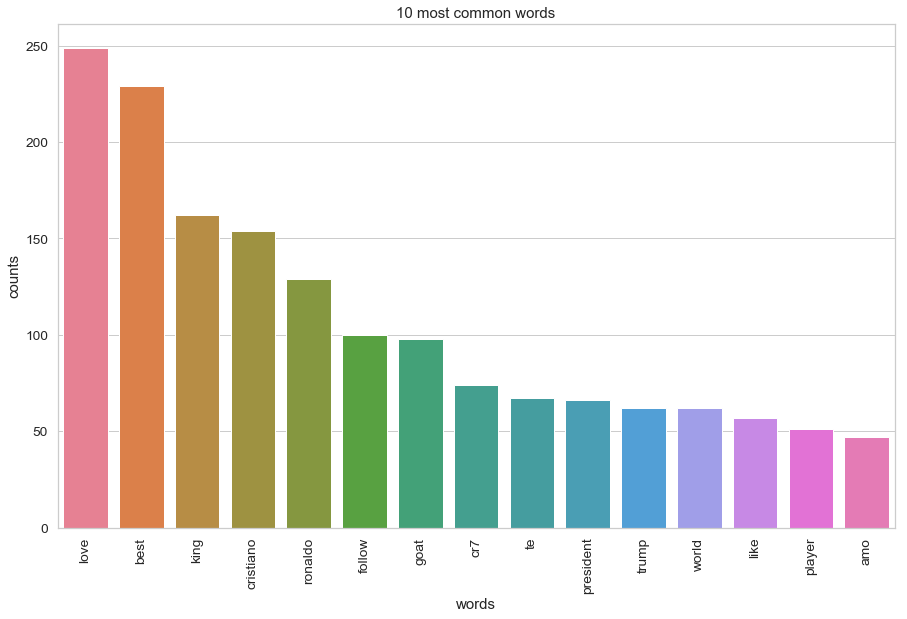

In [113]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_analyse_temp['comment_text_clean'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [55]:
# for i, row in df_analyse_temp.iterrows():
#     if i % 1000 == 0:
#         print(i)
#     if(row["comment_text_clean"] and len(str(row["comment_text_clean"])) < 1000000):
#         doc = nlp(str(row["comment_text_clean"]))
#         adjectives = []
#         nouns = []
#         verbs = []
#         lemmas = []

#         for token in doc:
#             lemmas.append(token.lemma_)
#             if token.pos_ == "ADJ":
#                 adjectives.append(token.lemma_)
#             if token.pos_ == "NOUN" or token.pos_ == "PROPN":
#                 nouns.append(token.lemma_)
#             if token.pos_ == "VERB":
#                 verbs.append(token.lemma_)
                
#         df_analyse_temp.at[i, "comment_text_clean_lemma"] = " ".join(lemmas)                
#         df_analyse_temp.at[i, "comment_text_clean_nouns"] = " ".join(nouns)
#         df_analyse_temp.at[i, "comment_text_clean_adjectives"] = " ".join(adjectives)
#         df_analyse_temp.at[i, "comment_text_clean_verbs"] = " ".join(verbs)
#         df_analyse_temp.at[i, "comment_text_clean_nav"] = " ".join(nouns+adjectives+verbs)
#         df_analyse_temp.at[i, "no_tokens"] = len(lemmas)

In [56]:
df_analyse_temp.head()

owener_id combined_username  \
0   14227465    chris_woodward   
1   14227465    chris_woodward   
2   14227465    chris_woodward   
3  201761741            masglu   
4  201761741            masglu   

                                        comment_text      cluster   community  \
0                                                 ❤️  C0_Fan_Page  politician   
1  @ajmal_hakkim_ if you had proper grammar peopl...  C0_Fan_Page  politician   
2  @n_aditya14 says someone that spells you’re “u...  C0_Fan_Page  politician   
3  Sick. Very sad. I wish we would have no more o...  C0_Fan_Page  politician   
4        Thanks for supporting ALL Americans!!🇺🇸🇺🇸🇺🇸  C0_Fan_Page  politician   

                                  comment_text_clean  \
0                                                      
1  if you had proper grammar people would be able...   
2               says someone that spells you’re “ur”   
3  sick very sad i wish we would have no more of ...   
4                thanks for supporting all americans   

                         comment_text_clean_filtered  Topic  
0                                                         0  
1  proper grammar people would able understand de...      1  
2                        says someone spells ’ “ur ”      3  
3              sick sad wish would no ’ afraid ’ end      3  
4                        thanks supporting americans      1

In [57]:
print(df_comment_politician.shape[0])
print(df_comment_newsagency.shape[0])
print(df_comment_sportstar.shape[0])

328
20
4471


In [58]:
import scattertext as st
import spacy
from pprint import pprint

ModuleNotFoundError: No module named 'scattertext'

In [ ]:
nlp = spacy.load('en')

In [ ]:
# print(list(corpus_new.get_scaled_f_scores_vs_background().index[:10]))

In [ ]:
# term_freq_df = corpus_new.get_term_freq_df()
# term_freq_df['community'] = corpus_new.get_scaled_f_scores('politician')
# pprint(list(term_freq_df.sort_values(by='community', ascending=False).index[:10]))

In [ ]:
corpus_new = st.CorpusFromPandas(df_analyse_temp, 
                              category_col='cluster', 
                              text_col='comment_text_clean',
                              nlp=nlp).build()

html = st.produce_scattertext_explorer(corpus_new,
          category=NAME_CLUSTER_0,
          category_name=NAME_CLUSTER_0,
          not_category_name=NAME_CLUSTER_2,
          width_in_pixels=1000,
#             metadata=df_analyse_temp['cluster']
          )

open("Convention-Visualization.html", 'wb').write(html.encode('utf-8'))

In [ ]:
feat_builder = st.FeatsFromOnlyEmpath()
empath_corpus = st.CorpusFromParsedDocuments(df_analyse_temp,
                                              category_col='cluster',
                                              feats_from_spacy_doc=feat_builder,
                                              parsed_col='comment_text_clean').build()

html = st.produce_scattertext_explorer(empath_corpus,
                                        category=NAME_CLUSTER_0,
                                        category_name=NAME_CLUSTER_0,
                                        not_category_name=NAME_CLUSTER_2,
                                        width_in_pixels=1000,
                                        metadata=df_analyse_temp['community'],
                                        use_non_text_features=True,
                                        use_full_doc=True,
                                        topic_model_term_lists=feat_builder.get_top_model_term_lists())
open("Convention-Visualization-Empath.html", 'wb').write(html.encode('utf-8'))

In [ ]:
# import scattertext as st

corpus = (st.CorpusFromPandas(df_analyse_temp,
                              category_col='cluster',
                              text_col='comment_text_clean',
                              nlp=st.whitespace_nlp_with_sentences)
          .build()
          .get_unigram_corpus()
          .compact(st.ClassPercentageCompactor(term_count=2,
                                               term_ranker=st.OncePerDocFrequencyRanker)))


html = st.produce_characteristic_explorer(
    corpus,
    category=NAME_CLUSTER_0,
    category_name=NAME_CLUSTER_0,
    not_category_name=NAME_CLUSTER_2,
    metadata=corpus.get_df()['community']
)
open('demo_characteristic_chart.html', 'wb').write(html.encode('utf-8'))